In [859]:
#importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

import os
print(os.listdir("../input"))

['california-housing-prices']


In [860]:
#reading the csv file
housing = pd.read_csv('../input/california-housing-prices/housing.csv')

In [861]:
#copy of dataset for our train_split function later
cali_housing = housing.copy(deep = True)

In [862]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [863]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**9 Dtype = float64 and 1 Dtype = object**

In [864]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

**Out of the 20640 instances in the dataset, 207 of those values are null in the "total_bedrooms" column.**

In [865]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [866]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


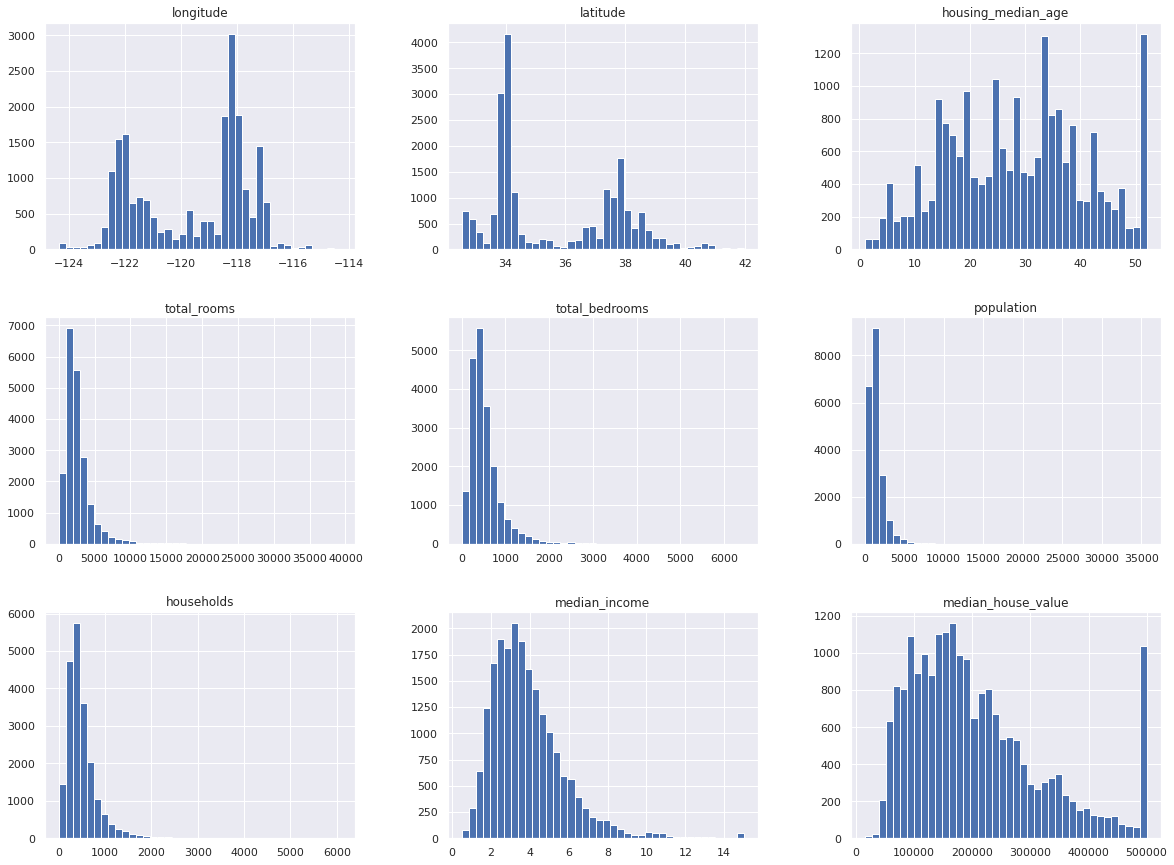

In [867]:
#creating histogram of dataset to determine important sections of data and to see if there are any outliers
housing.hist(bins = 40,figsize = (20,15))
plt.show()

**We can see from the histograms where the outliers in the data are and act accordingly. The outliers in "housing_median_age" and "median_house_value" stand out the most.**

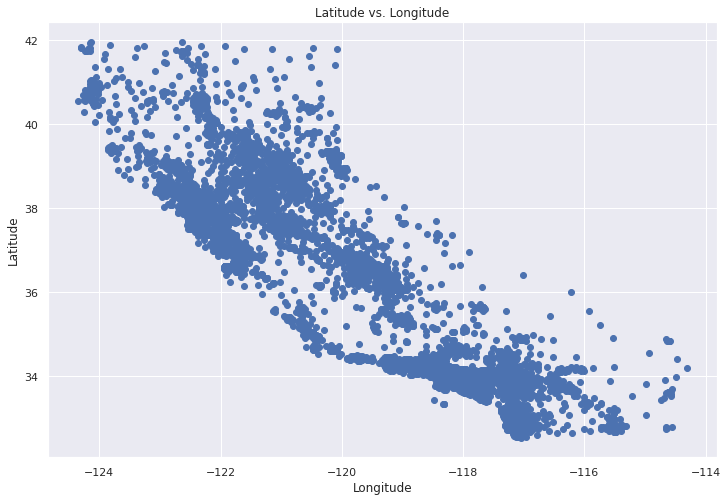

In [868]:
sns.set()
plt.figure(figsize = (12,8))
plt.scatter('longitude','latitude',data=housing)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Latitude vs. Longitude')
plt.show()

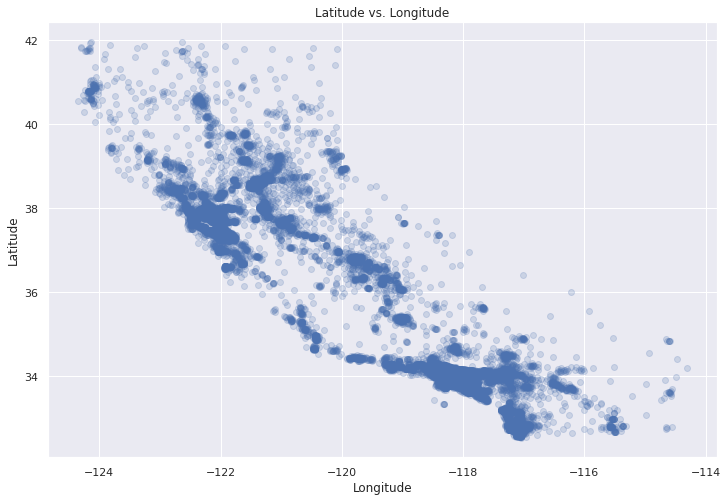

In [869]:
sns.set()
plt.figure(figsize = (12,8))#Figure size
plt.scatter('longitude','latitude',data = housing,alpha = 0.2)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.title('Latitude vs. Longitude')
plt.show()

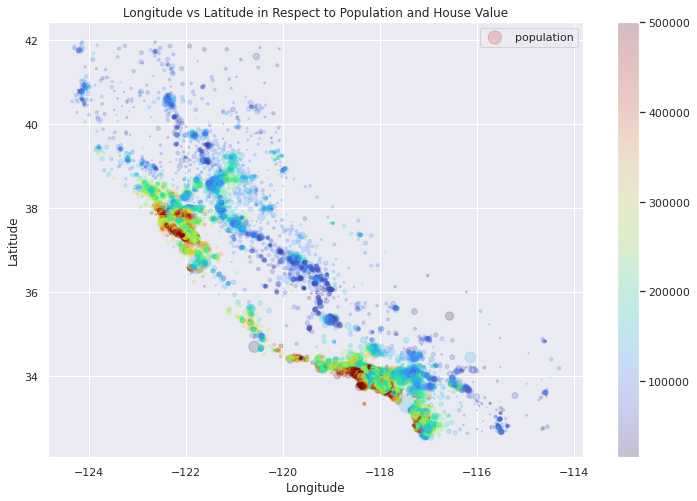

In [870]:
plt.figure(figsize = (12,8))
sc = plt.scatter(housing["longitude"], housing["latitude"],
                 alpha = 0.2, cmap="turbo", c = housing["median_house_value"],
                 s = housing["population"] / 100,  label = 'population')
plt.colorbar(sc)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude vs Latitude in Respect to Population and House Value")
plt.legend()
plt.show()

In [871]:
#checking correlation between each attribute and median_house_value
corr_matrix = cali_housing.corr()
corr_matrix.median_house_value.sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

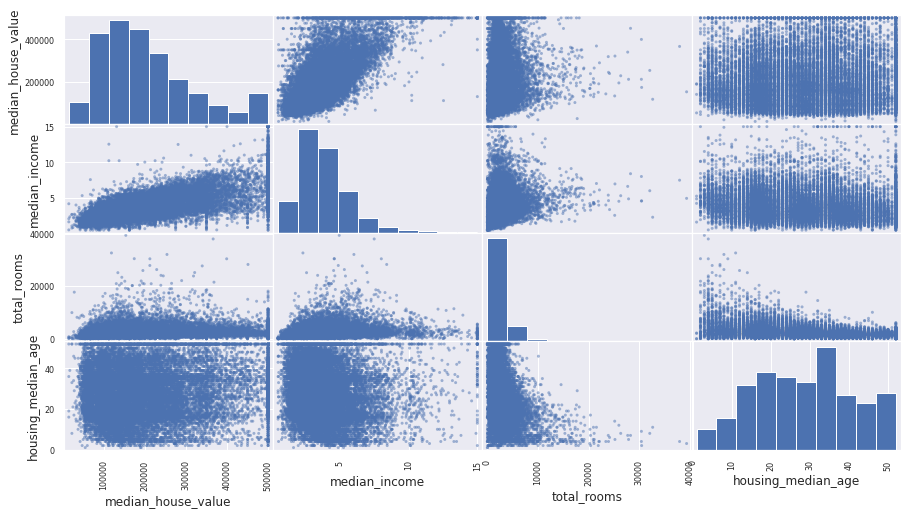

In [872]:
#scatter matrix showing the correlation between the top 4 attributes
from pandas.plotting import scatter_matrix
sns.set()
feat = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(cali_housing[feat],figsize = (15,8))

Text(0.5, 1.0, 'Median House Value vs. Median Income Correlation')

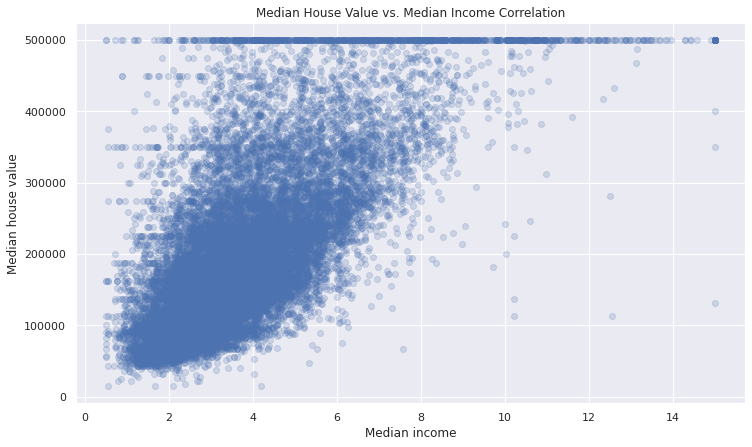

In [873]:
#median_house_value and median_income have the strongest correlation
plt.figure(figsize = (12,7))
plt.scatter('median_income','median_house_value',data = cali_housing,alpha = 0.2)
plt.xlabel('Median income')
plt.ylabel('Median house value')
plt.title('Median House Value vs. Median Income Correlation')

In [874]:
#implementing features that might be more helpful for the dataset
cali_housing['rooms_per_household'] = cali_housing.total_rooms / cali_housing.households
cali_housing["people_per_householed"] = cali_housing.population / cali_housing.households

In [875]:
#displaying newly implemented features
cali_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,people_per_householed
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,2.181467


In [876]:
corr_matrix = cali_housing.corr()

In [877]:
#seeing how our implemented features correlate to median_house_value
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value       1.000000
median_income            0.688075
rooms_per_household      0.151948
total_rooms              0.134153
housing_median_age       0.105623
households               0.065843
total_bedrooms           0.049686
people_per_householed   -0.023737
population              -0.024650
longitude               -0.045967
latitude                -0.144160
Name: median_house_value, dtype: float64

In [878]:
#filling null values with median attribute values using imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [879]:
housing_fit = cali_housing.drop("ocean_proximity",axis = 1)

In [880]:
imputer.fit(housing_fit)
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.81811565e+00])

In [881]:
housing_fit.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.81811565e+00])

In [882]:
X = imputer.transform(housing_fit)

In [883]:
housing_transformed = pd.DataFrame(X,columns = housing_fit.columns)
housing_transformed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,people_per_householed
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,2.181467


In [884]:
housing_transformed.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
median_house_value       0
rooms_per_household      0
people_per_householed    0
dtype: int64

In [885]:
housing_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   longitude              20640 non-null  float64
 1   latitude               20640 non-null  float64
 2   housing_median_age     20640 non-null  float64
 3   total_rooms            20640 non-null  float64
 4   total_bedrooms         20640 non-null  float64
 5   population             20640 non-null  float64
 6   households             20640 non-null  float64
 7   median_income          20640 non-null  float64
 8   median_house_value     20640 non-null  float64
 9   rooms_per_household    20640 non-null  float64
 10  people_per_householed  20640 non-null  float64
dtypes: float64(11)
memory usage: 1.7 MB


In [886]:
housing_transformed.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'people_per_householed'],
      dtype='object')

In [887]:
house_data = housing_transformed[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'people_per_householed']]

In [888]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(house_data)
house_data = pd.DataFrame(scaler.transform(house_data), index= house_data.index, columns= house_data.columns)

In [889]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,people_per_householed
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.085616


In [890]:
x = house_data.drop(["median_house_value"], axis = 1).values
y = house_data['median_house_value'].values

In [891]:
# import the train_test_split
from sklearn.model_selection import train_test_split

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 20)

In [892]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predict_lin_reg = lin_reg.predict(x_test)

In [893]:
lin_reg.score(x_train, y_train)

0.6387103045467208

In [894]:
lin_reg.score(x_test, y_test)

0.6273690058384889

In [895]:
lin_reg.intercept_

-0.0028323366511544394

In [896]:
lin_reg.coef_

array([-0.75176636, -0.80534583,  0.1246627 , -0.13376955,  0.23690508,
       -0.45442325,  0.38263198,  0.63559382,  0.03558461,  0.01295335])

In [897]:
pd.DataFrame(lin_reg.coef_,house_data.columns[:-1],columns = ['coeficients'])

,coeficients
longitude,-0.751766
latitude,-0.805346
housing_median_age,0.124663
total_rooms,-0.133770
total_bedrooms,0.236905
population,-0.454423
households,0.382632
median_income,0.635594
median_house_value,0.035585
rooms_per_household,0.012953


In [898]:
y_pred1 = lin_reg.predict(x_test)

In [899]:
house_data1 = pd.DataFrame({'y_test':y_test,'y_pred':y_pred1})

In [900]:
house_data1.head()

,y_test,y_pred
0,-0.773495,-0.694754
1,0.739597,0.664016
2,-0.654771,-0.343350
3,0.511680,0.361657
4,0.028981,0.199198


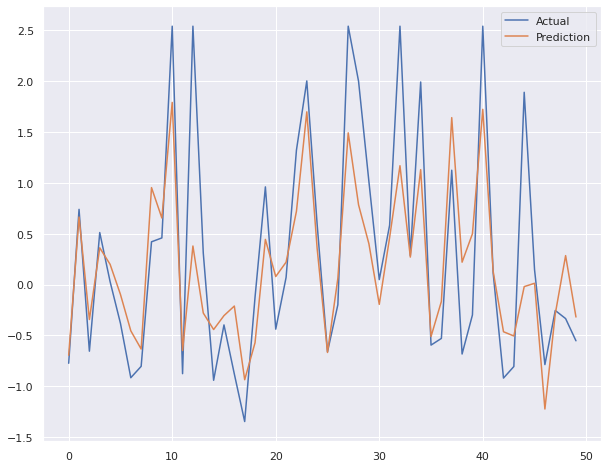

In [901]:
plt.figure(figsize = (10,8))
plt.plot(house_data1[:50])
plt.legend(["Actual", "Prediction"]);

In [909]:
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, predict_lin_reg))
lin_reg_score = r2_score(y_test, predict_lin_reg)

print('RMSE:     ', lin_reg_rmse)
print('R-Squared:', lin_reg_score)

RMSE:      0.6247961013960487
R-Squared: 0.6273690058384889


In [903]:
rand_forest = RandomForestRegressor(n_estimators = 100, random_state = 20)
rand_forest.fit(x_train, y_train)
predict_rand_forest = rand_forest.predict(x_test)

In [904]:
rand_forest.score(x_train, y_train)

0.9726811776691636

In [905]:
rand_forest.score(x_test, y_test)

0.8154919943481392

In [906]:
rand_forest_rmse = np.sqrt(mean_squared_error(y_test, predict_rand_forest))
rand_forest_score = r2_score(y_test, predict_rand_forest)

print('RMSE:     ', rand_forest_rmse)
print('R-Squared:', rand_forest_score)

RMSE:      0.4396493451995385
R-Squared: 0.8154919943481392


In [907]:
models = ["Linear Regression","Random Forest"]
data = [[lin_reg_score,lin_reg_rmse],[rand_forest_score,rand_forest_rmse]]
cols = ['r2_score','RMSE']
pd.DataFrame(data = data , columns = cols , index = models).sort_values(ascending = False , by = ["r2_score"])

,r2_score,RMSE
Random Forest,0.815492,0.439649
Linear Regression,0.627369,0.624796
